## Quant Finance Modelling

***

## Project Description

Our client is a large global online lending platform that provides loans to both consumers and merchants. These instruments are classified as assets on the balance sheet. 

Our audit colleagues have asked for our help to ensure the balance sheet values are correct. The value of the loan portfolio depends on future cash flows, which are stochastic. 

Our job is to ensure that the client’s portfolio has been valued correctly.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

import datetime
from datetime import datetime, timedelta

import scipy.stats

import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Webscraping
#import requests
#from bs4 import BeautifulSoup

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("Data.csv", sep=';')

In [3]:
df

,Unnamed: 0,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,29.02.2020,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
0,31.05.2019,10018746.17,1443069.08,3332200.33,1328138.75,928085.74,736418.27,539403.31,427557.86,324459.32,237056.39,168364.60,116684.68,92699.67,63399.66,53265.12,37121.13,29787.10,24524.90,18085.94,16581.01,11442.97
1,30.06.2019,10868379.04,0.00,1392751.60,3011884.91,1237868.70,970929.28,892351.83,668767.02,505612.59,419598.74,329262.69,255222.42,198833.96,161996.73,138461.91,92346.68,79641.30,63457.44,52373.85,43374.70,37404.87
2,31.07.2019,10733932.61,0.00,0.00,1537650.24,2953335.55,1208316.08,879375.19,711016.84,658251.40,503465.03,423045.23,302575.54,258652.52,191798.05,170027.54,127574.33,110301.21,89766.69,64746.84,61408.92,50312.70
3,31.08.2019,12558727.02,0.00,0.00,0.00,1617681.94,4082016.00,1387474.94,1247623.59,886293.35,694348.63,571024.44,417223.56,336686.08,253556.20,200066.59,151859.74,109973.00,90228.14,70661.50,53102.83,47069.84
4,30.09.2019,14505071.44,0.00,0.00,0.00,0.00,1992242.84,3930445.60,1394620.78,1227905.58,939424.54,802871.19,628429.48,589692.85,457299.31,323764.87,288152.28,239872.99,192246.98,171550.69,142575.97,116853.05
5,31.10.2019,15652952.20,0.00,0.00,0.00,0.00,0.00,2289453.76,4682354.31,1659503.89,1165897.09,978861.35,763523.36,742787.97,558085.95,461806.22,358671.23,281881.11,241719.91,182730.05,144953.58,119260.10
6,30.11.2019,15107713.30,0.00,0.00,0.00,0.00,0.00,0.00,2162283.09,4637701.69,1576348.23,1144559.96,930720.35,697500.94,667277.73,547749.09,387987.02,309448.86,283876.04,215635.85,185516.45,141560.57
7,31.12.2019,17004745.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2402403.37,4947764.21,1523145.18,1245452.39,1116505.94,803590.21,724956.28,545397.33,458832.95,393971.01,333818.53,286831.44,216447.57
8,31.01.2020,16794379.95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2502066.86,4696910.48,1505493.21,1182983.95,955821.48,846061.73,683116.81,560572.44,468203.76,349067.92,309854.99,267813.78
9,29.02.2020,19217205.82,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2833811.35,6142911.08,1833677.81,1317065.75,1108494.37,918465.33,719913.69,587381.96,498801.31,371563.77,294941.22


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          20 non-null     object 
 1   Origination Amount  20 non-null     float64
 2   31.05.2019          20 non-null     float64
 3   30.06.2019          20 non-null     float64
 4   31.07.2019          20 non-null     float64
 5   31.08.2019          20 non-null     float64
 6   30.09.2019          20 non-null     float64
 7   31.10.2019          20 non-null     float64
 8   30.11.2019          20 non-null     float64
 9   31.12.2019          20 non-null     float64
 10  31.01.2020          20 non-null     float64
 11  29.02.2020          20 non-null     float64
 12  31.03.2020          20 non-null     float64
 13  30.04.2020          20 non-null     float64
 14  31.05.2020          20 non-null     float64
 15  30.06.2020          20 non-null     float64
 16  31.07.2020

In [5]:
df.describe()

,Origination Amount,31.05.2019,30.06.2019,31.07.2019,31.08.2019,30.09.2019,31.10.2019,30.11.2019,31.12.2019,31.01.2020,29.02.2020,31.03.2020,30.04.2020,31.05.2020,30.06.2020,31.07.2020,31.08.2020,30.09.2020,31.10.2020,30.11.2020,31.12.2020
count,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
mean,19939467.33,72153.45,236247.60,293883.70,336848.60,449496.12,495925.23,564711.17,615106.56,649298.49,673592.82,757576.08,830564.99,853358.13,956544.77,1005885.89,974952.43,1044697.39,959117.53,1078136.99,1057797.08
std,6563823.58,322680.06,792300.37,777053.10,776747.88,1014007.01,1014546.82,1143840.89,1159721.64,1214029.89,1189680.77,1457239.16,1517052.30,1573937.09,1811136.03,2054032.70,1860875.72,1959496.76,1672878.24,2055730.52,1978896.28
min,10018746.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11442.97
25%,14957052.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,27840.85,67177.75,83189.38,69182.83,122284.21,118658.34
50%,20422650.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,84182.30,185953.55,228743.24,222677.12,261915.73,323411.76,295664.98,338923.53,341443.22,340709.38,403307.49
75%,25578379.41,0.00,0.00,0.00,0.00,184104.57,624396.28,679329.47,715261.89,755617.61,846868.73,805322.61,836217.46,841648.03,911669.89,966593.59,985200.15,1030445.83,956525.15,1003412.98,984121.62
max,30482978.52,1443069.08,3332200.33,3011884.91,2953335.55,4082016.00,3930445.60,4682354.31,4637701.69,4947764.21,4696910.48,6142911.08,6228477.78,6476251.76,7636995.58,8983764.16,8030091.09,8374134.70,7065477.24,8752706.73,8383025.07


In [6]:
df.columns

Index(['Unnamed: 0', 'Origination Amount', '31.05.2019', '30.06.2019', '31.07.2019', '31.08.2019', '30.09.2019', '31.10.2019', '30.11.2019', '31.12.2019', '31.01.2020', '29.02.2020', '31.03.2020', '30.04.2020', '31.05.2020', '30.06.2020', '31.07.2020', '31.08.2020', '30.09.2020', '31.10.2020', '30.11.2020', '31.12.2020'], dtype='object')

## Data Visualization

### Univariate Data Exploration

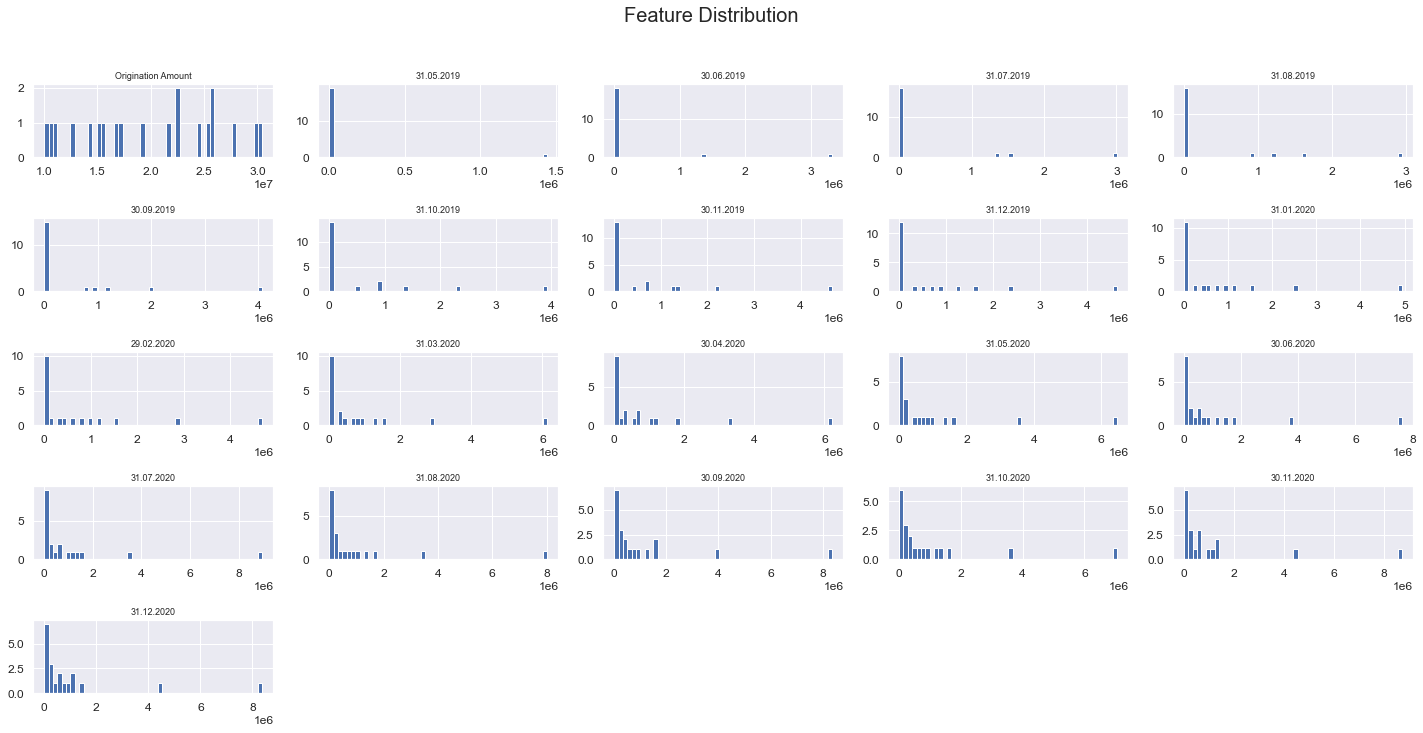

In [7]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

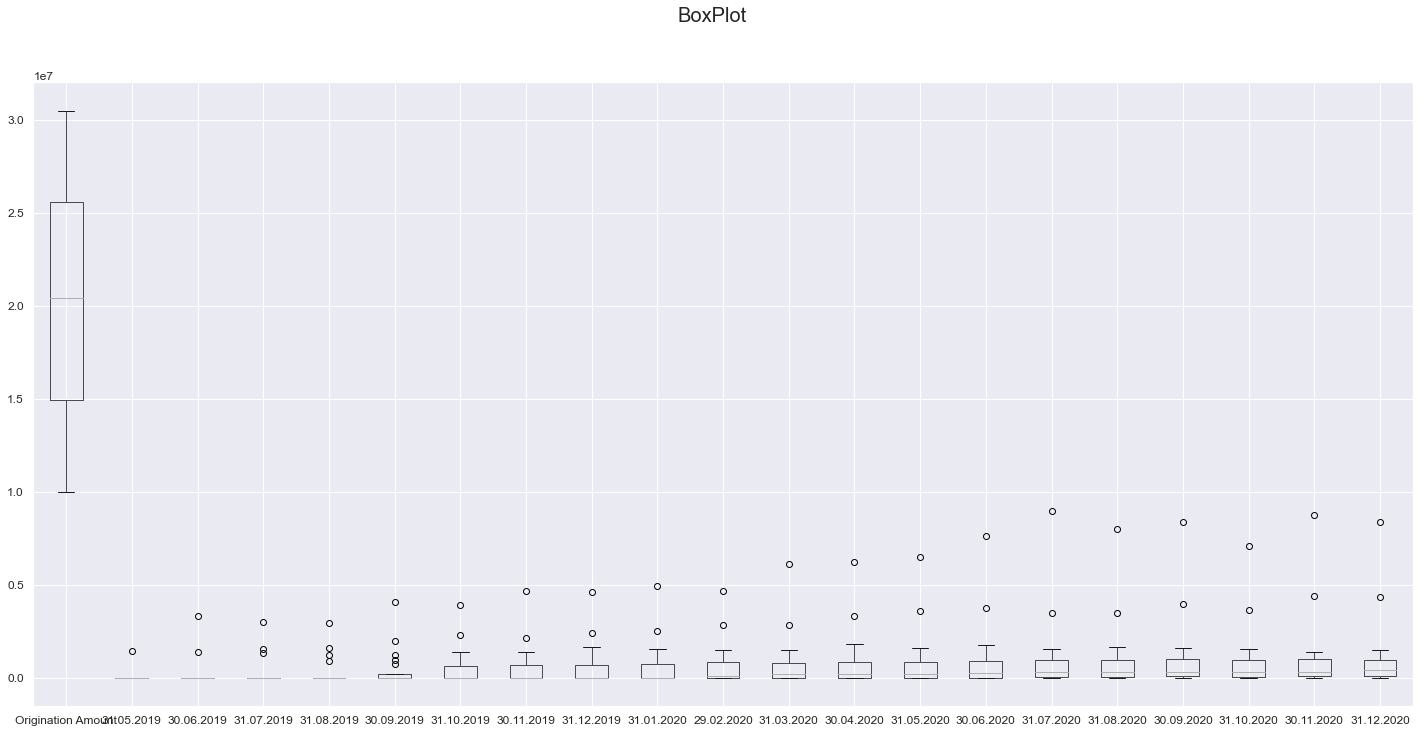

In [8]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlot', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

## Data Preprocessing

### Feature Engineering

### Drop unwanted features

In [ ]:
df.columns

In [ ]:
df.drop()

### Treat Missing Values

In [ ]:
df.isnull().sum()

In [ ]:
df[''] = df[''].replace(np.nan,df.mean())

In [ ]:
#imputer = mdi.MeanMedianImputer(imputation_method='median',variables=None)

In [ ]:
#imputer.fit(df)

In [ ]:
#df = imputer.transform(df)

In [ ]:
df.isnull().sum()

### Replacing values

In [ ]:
df.replace()

### Rounding Values

In [ ]:
###pandas.DataFrame.round
df[['internetuserate']] = df[['internetuserate']].round(decimals=0)

### Treat Duplicate Values

In [ ]:
df.duplicated(keep='first').sum()

In [ ]:
df[df.duplicated(keep=False)] #Check duplicate values

In [ ]:
df.drop_duplicates(ignore_index=True, inplace=True)

### Treat Outliers

In [ ]:
df.columns

In [ ]:
df.describe()

In [ ]:
#windsorizer = Winsorizer(distribution='skewed',tail='both',fold=1.5, variables=[])

In [ ]:
#windsorizer.fit(df)

In [ ]:
#df2 = windsorizer.transform(df)

In [ ]:
#df2

In [ ]:
#df2.describe()

In [ ]:
#windsorizer.left_tail_caps_

In [ ]:
#windsorizer.right_tail_caps_

### Type Change

In [ ]:
df.info()

In [ ]:
df["breastcancerper100th"] = df["breastcancerper100th"].astype('int')

In [ ]:
df.info()

### One-hot encoding

In [ ]:
df.info()

In [ ]:
df["has_gas"] = pd.get_dummies(data=df["has_gas"],drop_first=True)

### Save to CSV

In [ ]:
df.to_csv("filename.csv", index=False)

## Regression Analysis

### Linear Regression

In [ ]:
df.columns

In [ ]:
y = df['ExpirationMonth']
X = df['NumStores']

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,X).fit()

In [ ]:
model.summary()

In [ ]:
prediction = model.predict(x)

In [ ]:
linreg = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df).fit()

### Residual Plots

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'x_variables', fig=fig)

#### Python code done by Dennis Lam